# Exploratory Data Analysis untuk Memprediksi Keputusan Order pada Dataset Data Mining Cup 2023

<hr>

<h2>Pendahuluan</h2>

<p>Di era digital ini, analisis data transaksi pelanggan semakin penting bagi perusahaan untuk memahami pola dan perilaku konsumen, terutama dalam bidang e-commerce dan retail. Salah satu cara yang efektif untuk meningkatkan keputusan bisnis adalah dengan menggunakan analisis data dan teknik prediksi agar kita bisa mengetahui kemungkinan seorang pelanggan melakukan order atau tidak.</p>

<p>Metode <strong>Exploratory Data Analysis</strong> (EDA) memungkinkan kita untuk menemukan pola-pola tersembunyi dan wawasan penting yang dapat membantu meningkatkan akurasi model prediktif. Dalam proyek ini, kita akan melakukan EDA pada dataset Data Mining Cup 2023 yang berisi data transaksi pelanggan. Dengan EDA ini, kita akan mengeksplorasi distribusi fitur-fitur utama, menangani data yang kosong, dan mencari tahu korelasi-korelasi yang bisa berguna dalam memprediksi keputusan order.</p>

<p>Pertanyaan utama yang ingin dijawab dalam proyek ini adalah sebagai berikut:</p>

<ul style="margin-top: 10px; margin-bottom: 20px;">
    <li>Bagaimana kita dapat memprediksi kemungkinan seorang pengunjung web-shop akan melakukan order berdasarkan data transaksi?</li>
</ul>

<p>Pertanyaan pendukung yang muncul dan perlu diselesaikan untuk menjawab pertanyaan utama ini adalah:</p>

<ul style="margin-top: 10px; margin-bottom: 20px;">
    <li>Bagaimana kita dapat membangun sistem prediksi menggunakan komponen open-source, untuk mengekstraksi fitur penting dari log transaksi web-shop, membangun model prediksi, dan menghasilkan prediksi?</li>
    <li>Apa strategi yang baik untuk menangani sejumlah besar missing values dalam pelatihan model prediksi?</li>
    <li>Bisakah kita membangun meta-classifier yang memanfaatkan output dari berbagai model prediksi untuk menghasilkan prediksi yang lebih baik?</li>
</ul>

<p>Melalui pendekatan ini, diharapkan kita dapat membangun dasar yang kuat untuk model klasifikasi yang nantinya akan kita gunakan dalam memprediksi apakah pelanggan akan melakukan order atau tidak.</p>


<b>Kelompok 5 :</b>
<ol>
    <li>Jihan Aqilah Hartono (2306827)</li>
    <li>Muhammad Hafidh Fadhilah (2305672)</li>
    <li>Putra Hadiyanto Nugroho (2308163)</li>
    <li>Yazid Madarizel (2305328)</li>
</ol>

## Import Library dan Dataset

Menginstal library XGBoost, yang berguna dalam membuat model prediksi kuat dalam machine learning.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

<p><strong>pandas as pd</strong>: Untuk memanipulasi data dalam bentuk tabel (DataFrame) yang memudahkan proses analisis.</p>
<p><strong>numpy as np</strong>: Untuk operasi matematis, perhitungan array, dan pengelolaan data numerik.</p>
<p><strong>matplotlib.pyplot as plt</strong>: Membuat berbagai jenis grafik untuk memahami data secara visual.</p>
<p><strong>seaborn as sns</strong>: Library visualisasi statistik yang menambahkan fungsi tambahan ke matplotlib, ideal untuk memplot grafik dengan data statistik.</p>
<p><strong>train_test_split, cross_val_score dari sklearn.model_selection</strong>: Membagi dataset menjadi data pelatihan dan pengujian, serta melakukan validasi silang untuk mengevaluasi stabilitas model.</p>
<p><strong>RandomForestClassifier</strong>: Algoritma machine learning berbasis ensemble yang menggabungkan beberapa decision tree untuk meningkatkan akurasi prediksi.</p>
<p><strong>XGBClassifier</strong>: Algoritma XGBoost yang efisien untuk klasifikasi, sering digunakan dalam kompetisi machine learning karena kinerjanya yang tinggi.</p>
<p><strong>accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, classification_report dari sklearn.metrics</strong>: Metrik evaluasi untuk mengukur kinerja model, termasuk akurasi, presisi, recall, dan F1-score untuk memahami kekuatan dan kelemahan prediksi model.</p>
<p><strong>SimpleImputer</strong>: Mengatasi nilai yang hilang dalam data dengan mengisi (imputasi) nilai kosong.</p>
<p><strong>LabelEncoder</strong>: Mengonversi kolom kategori menjadi label numerik, memudahkan pemodelan machine learning.</p>


In [2]:
transact_class = pd.read_csv("https://raw.githubusercontent.com/putrahadiyanto/Kelompok5_Tugas3_DataMining/refs/heads/main/transact_class.txt", sep = "|")
transact_train = pd.read_csv("https://raw.githubusercontent.com/putrahadiyanto/Kelompok5_Tugas3_DataMining/refs/heads/main/transact_train.txt", sep = "|")

<p>Memuat dua file data, <strong>transact_class</strong> dan <strong>transact_train</strong>, dari URL dan menyimpannya dalam DataFrame <strong>pandas</strong>. Tujuannya adalah agar data siap untuk dianalisis atau diolah lebih lanjut.</p>


## Eksplorasi Data Awal

### Menampilkan Info Tabel Dataset

<p>Pemeriksaan info tabel yang berguna untuk memverifikasi tipe data pada setiap kolom, memastikan konversi ke tipe numerik sudah sesuai, dan mempersiapkan data agar siap dianalisis tanpa kendala.</p>


In [3]:
transact_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429013 entries, 0 to 429012
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sessionNo        429013 non-null  int64  
 1   startHour        429013 non-null  int64  
 2   startWeekday     429013 non-null  int64  
 3   duration         429013 non-null  float64
 4   cCount           429013 non-null  int64  
 5   cMinPrice        429013 non-null  object 
 6   cMaxPrice        429013 non-null  object 
 7   cSumPrice        429013 non-null  object 
 8   bCount           429013 non-null  int64  
 9   bMinPrice        429013 non-null  object 
 10  bMaxPrice        429013 non-null  object 
 11  bSumPrice        429013 non-null  object 
 12  bStep            429013 non-null  object 
 13  onlineStatus     429013 non-null  object 
 14  availability     429013 non-null  object 
 15  customerNo       429013 non-null  object 
 16  maxVal           429013 non-null  obje

### Menampilkan Contoh Data dari Dataset

In [113]:
transact_train.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,bStep,availability,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,NaN,NaN,600.0,70.0,21.0,1.0,43.0,1.0,49.0,1
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,2.0,7.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,1
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,NaN,7.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,1
3,2,6,5,0.000,0,NaN,NaN,NaN,0,NaN,...,2.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2,6,5,15.633,0,NaN,NaN,NaN,0,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


## Mengubah value '?' menjadi None

<p>Membersihkan data dengan mengubah tanda <strong>?</strong> menjadi nilai NaN dan mengonversi kolom tertentu ke tipe numerik agar siap untuk dianalisis tanpa hambatan.</p>


In [5]:
# List kolom yang akan diubah jadi float
columns_to_convert = ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep' ,
                        'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'address', 'lastOrder']

# Mengubah kolom pada list menjadi float
transact_train[columns_to_convert] = transact_train[columns_to_convert].replace({'?': None}).astype(float)
transact_class[columns_to_convert] = transact_train[columns_to_convert].replace({'?': None}).astype(float)

In [6]:
# List kolom yang akan diubah 
columns_to_convert = ['onlineStatus' ,'availability', 'customerNo', 'order']

# Mengubah value '?' menjadi none
transact_train[columns_to_convert] = transact_train[columns_to_convert].replace({'?': None})
transact_class[columns_to_convert] = transact_train[columns_to_convert].replace({'?': None})

### Mengecek Jumlah Missing Value Per Kolom

<p>Pemeriksaan ini bertujuan untuk menghitung dan menampilkan jumlah serta persentase nilai hilang di tiap kolom, membantu kita memahami kualitas data secara keseluruhan. Dengan informasi ini, kita bisa memutuskan cara terbaik menangani nilai hilang, seperti mengisi kekosongan atau menghapus kolom yang terlalu banyak kosong, sehingga data siap dianalisis dan dimodelkan tanpa hambatan.</p>


In [7]:
missing_info = {}

for column in transact_train.columns:
    missing_count = transact_train[column].isnull().sum()
    missing_percentage = (missing_count / len(transact_train)) * 100
    missing_info[column] = [missing_count, missing_percentage]

missing_df = pd.DataFrame(missing_info, index=["Missing Values", "Persentase"])

# Tampilkan data dengan di transpose
missing_df.T

,Missing Values,Persentase
sessionNo,0.0,0.000000
startHour,0.0,0.000000
startWeekday,0.0,0.000000
duration,0.0,0.000000
cCount,0.0,0.000000
cMinPrice,2765.0,0.644503
cMaxPrice,2765.0,0.644503
cSumPrice,2765.0,0.644503
bCount,0.0,0.000000
bMinPrice,5130.0,1.195768


### Mengecek Value yang ada pada dataset pada kolom startHour

Pada file features.pdf telah dijelaskan rentang nilai untuk kolom startHour. Namun, kami perlu memverifikasi nilai-nilai yang terdapat pada kolom startHour dalam dataset ini.

In [8]:
transact_train['startHour'].unique()

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23,  0,  1,  2,  3,  4,  5])

### Mengecek value yang ada pada dataset pada kolom startWeekday

Pada file features.pdf telah dijelaskan rentang nilai untuk kolom startWeekday. Namun, kami perlu memverifikasi nilai-nilai yang terdapat pada kolom startWeekday dalam dataset ini.

In [9]:
transact_train['startWeekday'].unique()

array([5, 6, 7])

### Melihat Variasi Value Pada Kolom Bertipe Numerik

Pemeriksaan deskripsi statistik dari kolom-kolom numerik membantu kita memahami distribusi dan variasi data, seperti rata-rata, standar deviasi, serta nilai minimum dan maksimum. Langkah ini memudahkan kita dalam analisis lanjutan dan menentukan perlakuan yang tepat pada data.

In [10]:
# Menampilkan deskripsi untuk kolom numerik yang relevan
columns_to_describe = ['cCount', 'cMinPrice', 'cMaxPrice', 'cSumPrice', 
                       'bCount', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 
                       'bStep', 'maxVal', 'customerScore', 'accountLifetime', 'payments']

# Deskripsi statistik dari kolom-kolom yang dipilih
transact_train[columns_to_describe].describe()

,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,bStep,maxVal,customerScore,accountLifetime,payments
count,429013.000000,426248.000000,426248.000000,426248.000000,429013.000000,423883.000000,423883.000000,423883.000000,237680.000000,275273.000000,275273.000000,275273.000000,277915.000000
mean,24.140317,55.289127,146.663005,1189.248209,4.135168,67.625341,107.505057,213.260809,2.292393,2486.358270,485.298449,135.557403,15.218016
std,30.398164,148.879937,283.217841,3371.173815,4.451778,174.986371,212.916300,459.389852,1.306963,3038.425813,131.027630,109.577139,34.892917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,6.990000,25.950000,137.960000,1.000000,8.990000,19.990000,39.990000,1.000000,600.000000,481.000000,43.000000,3.000000
50%,13.000000,12.000000,49.990000,388.000000,3.000000,14.990000,39.990000,87.970000,2.000000,1500.000000,520.000000,109.000000,8.000000
75%,31.000000,29.990000,99.990000,1046.430000,5.000000,34.990000,79.790000,205.380000,3.000000,4000.000000,555.000000,219.000000,15.000000
max,200.000000,5999.990000,6999.990000,115742.000000,108.000000,6999.990000,6999.990000,23116.880000,5.000000,50000.000000,638.000000,600.000000,868.000000


### Menampilkan Variasi Value Yang Ada Pada Kolom Availability

Pemeriksaan nilai unik pada kolom `availability` membantu kita memahami variasi data yang ada di kolom tersebut, sehingga memudahkan identifikasi nilai yang mungkin perlu diperhatikan atau diolah lebih lanjut dalam analisis.

In [11]:
transact_train['availability'].unique()

array([None, 'completely orderable', 'completely not orderable',
       'mainly orderable', 'mixed', 'mainly not orderable',
       'completely not determinable', 'mainly not determinable'],
      dtype=object)

## Praproses Awal

### Drop Kolom Online Status dan CustomerNo

Penghapusan kolom `onlineStatus` dan `customerNo` dari dataset bertujuan untuk menyederhanakan data dan menghilangkan informasi yang kurang relevan bagi analisis dan pemodelan. Kolom `onlineStatus` tidak memberikan kontribusi signifikan terhadap hasil prediksi dan justru bisa membingungkan saat kita mencoba menginterpretasi data. Sementara itu, kolom `customerNo` hanya berfungsi sebagai pengidentifikasi unik untuk setiap pelanggan tanpa memberikan wawasan tentang perilaku atau karakteristik yang bisa diprediksi. Dengan menghapus kedua kolom ini, kita bisa meningkatkan efisiensi analisis dan model, serta lebih fokus pada informasi yang penting untuk mendapatkan hasil yang lebih akurat.

In [12]:
# df = df.drop(columns=['col2', 'col4'])
transact_train = transact_train.drop(columns=['onlineStatus', 'customerNo'])
transact_class = transact_class.drop(columns=['onlineStatus', 'customerNo'])

### Mengubah isi data 'y' menjadi 1 dan 'n' menjadi 0

Pengubahan nilai pada kolom `order` dari 'y' menjadi 1 dan 'n' menjadi 0 bertujuan untuk menyederhanakan data menjadi format numerik, sehingga memudahkan proses analisis dan pemodelan machine learning.

In [13]:
# Mengubah value kolom order 'y' jadi 1 dan 'n' jadi 0
transact_train['order'] = transact_train['order'].replace({'y': 1, 'n': 0})
transact_class['order'] = transact_train['order'].replace({'y': 1, 'n': 0})

### Mengubah Value Pada Kolom Availability Menjadi Numerik  

Langkah ini bertujuan untuk mengonversi kategori dalam kolom `availability` menjadi angka, sehingga data lebih mudah diproses dalam analisis dan pemodelan. Dengan mengganti kategori dengan nilai numerik, kita meningkatkan efisiensi pengolahan data, karena banyak algoritma pembelajaran mesin memerlukan format numerik. Pemetaan ini memungkinkan kita untuk mempertahankan makna kategoris sambil membuat kolom `availability` lebih berguna sebagai fitur dalam model, sehingga membantu dalam meningkatkan akurasi prediksi.

In [114]:
# Mapping untuk mengganti kategori dengan angka
availability_mapping = {
    'completely orderable': 7,
    'completely not orderable': 6,
    'mainly orderable': 5,
    'mixed': 4,
    'mainly not orderable': 3,
    'completely not determinable': 2,
    'mainly not determinable': 1
}

# Mengganti nilai langsung dalam kolom 'availability'
transact_train['availability'] = transact_train['availability'].replace(availability_mapping)

transact_train

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,bStep,availability,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,NaN,NaN,600.0,70.0,21.0,1.0,43.0,1.0,49.0,1
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,2.0,7.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,1
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,NaN,7.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,1
3,2,6,5,0.000,0,NaN,NaN,NaN,0,NaN,...,2.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2,6,5,15.633,0,NaN,NaN,NaN,0,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429008,49998,18,7,5988.882,77,9.99,149.99,5253.28,3,49.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
429009,49999,18,7,675.114,6,59.00,199.99,509.96,1,89.99,...,NaN,NaN,NaN,NaN,NaN,0.0,24.0,1.0,4.0,0
429010,49999,18,7,715.341,7,59.00,649.99,1159.95,1,89.99,...,1.0,7.0,NaN,NaN,NaN,0.0,24.0,1.0,4.0,0
429011,50000,18,7,0.000,1,6.99,6.99,6.99,1,6.99,...,NaN,NaN,300.0,537.0,5.0,0.0,53.0,1.0,34.0,0


## Visualisasi Analisis Data Awal

### Distribusi setiap kolom

Histogram ini bertujuan melihat bagaimana data tersebar di setiap kolom numerik, membantu kita cepat menangkap pola dan outlier yang bisa berdampak pada analisis.

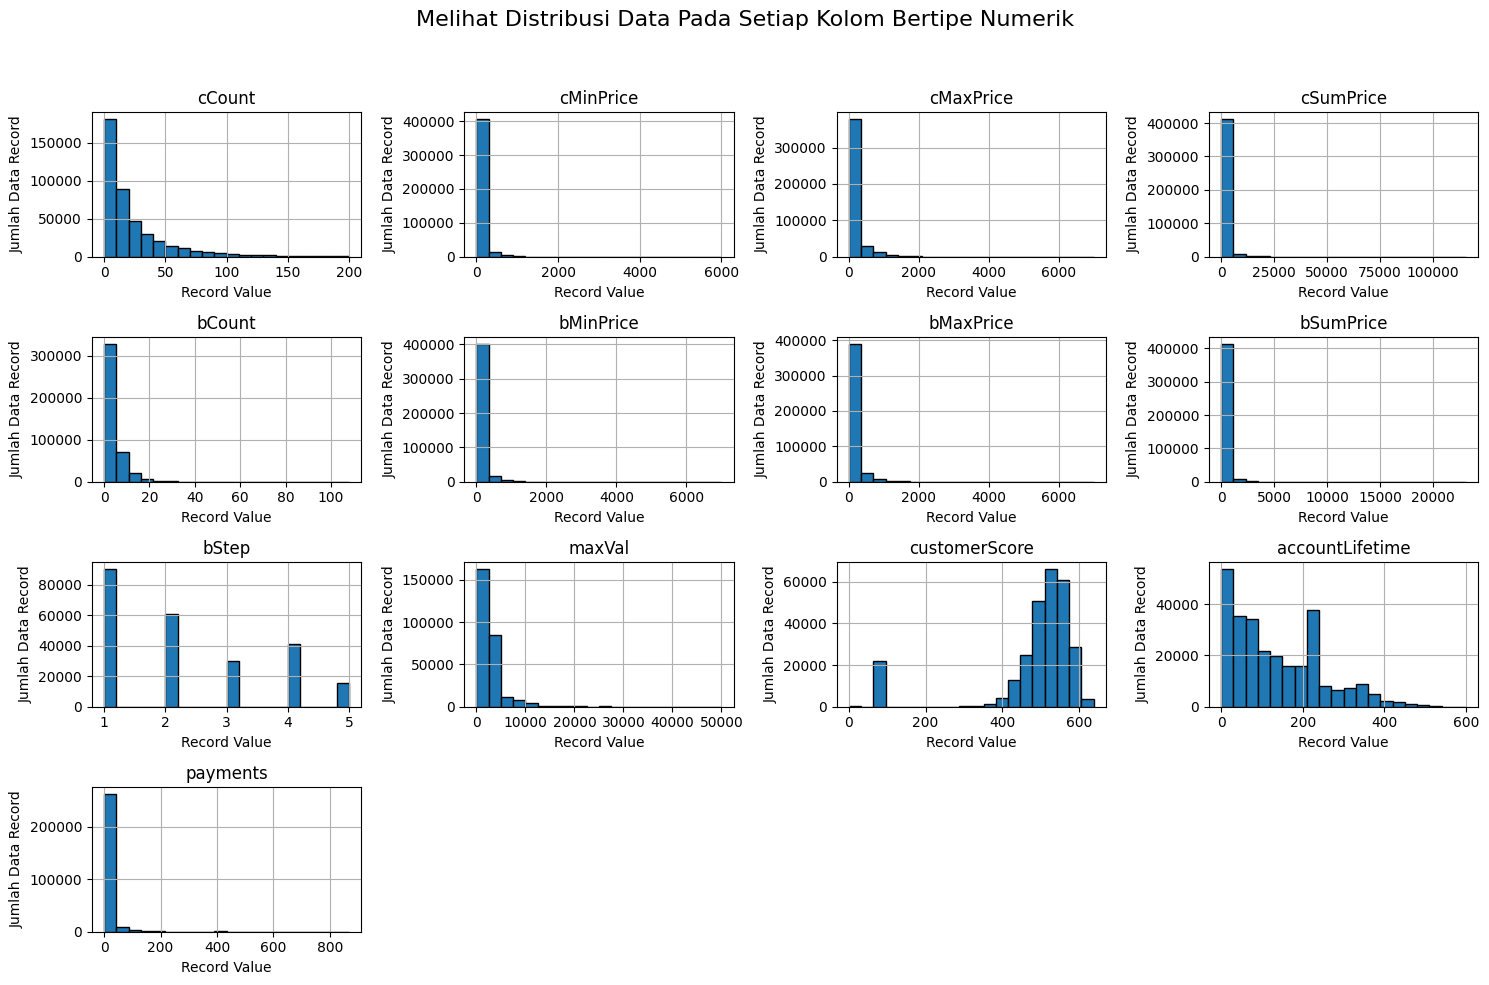

In [15]:

# Membuat list kolom yang akan ditampilkan
columns_to_plot = ['cCount', 'cMinPrice', 'cMaxPrice', 'cSumPrice', 
                   'bCount', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 
                   'bStep', 'maxVal', 'customerScore', 'accountLifetime', 'payments']

# Membuat histogram untuk setiap kolom di 'columns_to_plot'
fig, axes = plt.subplots(len(columns_to_plot) // 4 + 1, 4, figsize=(15, 10))  # Buat grid
axes = axes.flatten()  # Flatten untuk akses subplot yang lebih mudah

# Loop untuk membuat histogram per kolom dan menambahkan label masing-masing
for i, col in enumerate(columns_to_plot):
    transact_train[col].hist(bins=20, ax=axes[i], edgecolor='black')
    axes[i].set_title(col)  # Judul untuk setiap subplot
    axes[i].set_xlabel('Record Value')  # Label X untuk setiap kolom
    axes[i].set_ylabel('Jumlah Data Record')  # Label Y untuk setiap kolom

# Menghapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menambahkan judul utama
fig.suptitle('Melihat Distribusi Data Pada Setiap Kolom Bertipe Numerik', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Distribusi Kolom Order

Visualisasi ini membantu kita melihat persentase tiap status order, jadi kita bisa mengetahui apakah jumlah order seimbang atau ada ketimpangan.

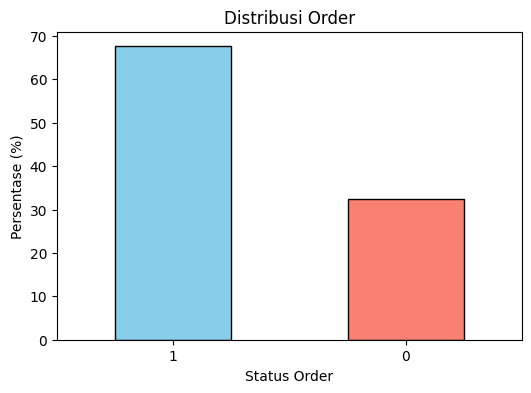

In [16]:
order_counts = transact_train['order'].value_counts(normalize=True) * 100  # Percentage representation

# Memplot distribusi kolom 'order'
plt.figure(figsize=(6, 4))
order_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Distribusi Order')
plt.xlabel('Status Order')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=0)
plt.show()

### Identifikasi Session Dengan Record Terbanyak  dan Observasi Timeline Setiap Atribut

Plot ini membantu kita melihat pola di setiap kolom numerik pada sesi yang paling sering muncul, sehingga kita bisa dengan mudah menangkap variasi dan tren yang mungkin penting dalam sesi tersebut.

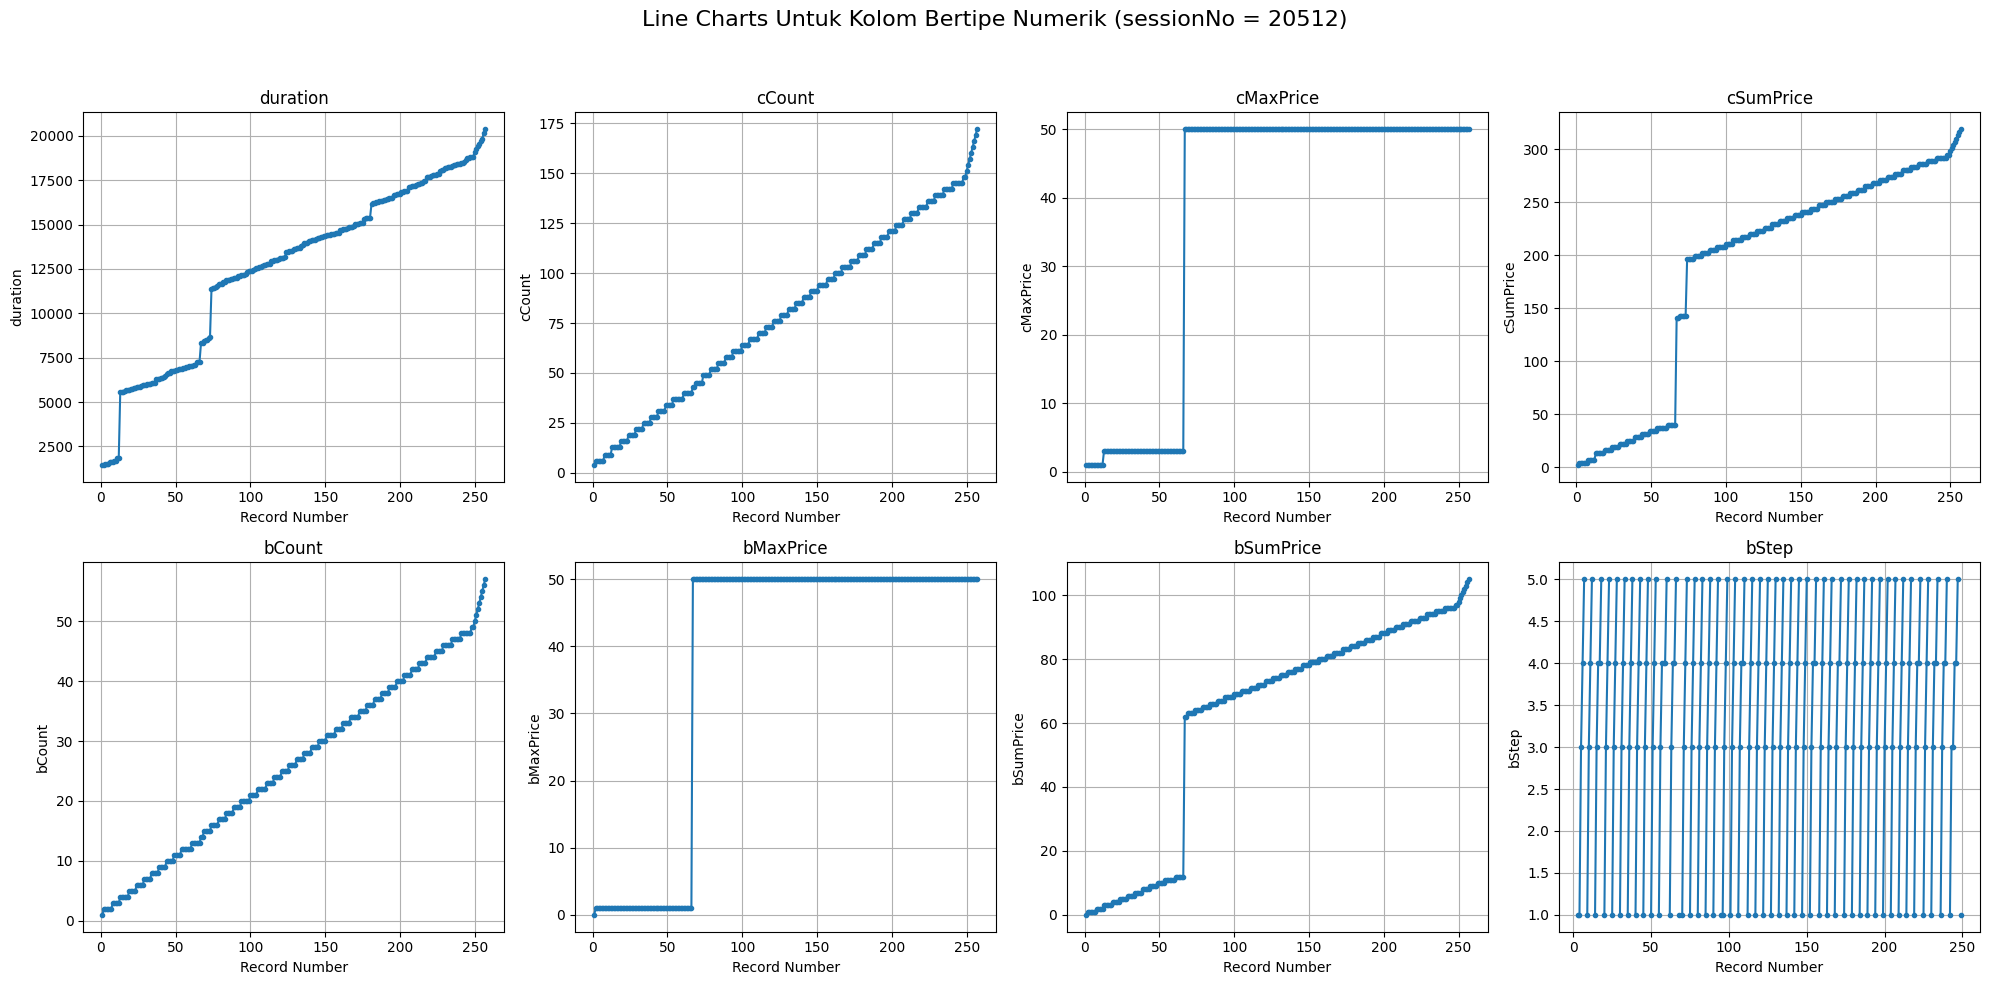

In [18]:
# Menyiapkan grid 2x4 untuk subplot
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle(f"Line Charts Untuk Kolom Bertipe Numerik (sessionNo = {session_mode})", fontsize=16)

# Meratakan array axes untuk mempermudah indexing
axes = axes.flatten()

# Memplot setiap kolom dengan layout yang ditentukan
for i, column in enumerate(numeric_columns):
    axes[i].plot(x_values, mode_data[column], marker='o', linestyle='-', markersize=3)
    axes[i].set_title(column)
    axes[i].set_xlabel('Record Number')
    axes[i].set_ylabel(column)
    axes[i].grid(True)

# Menyesuaikan layout agar lebih mudah dibaca
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Menambah ruang untuk judul utama

plt.show()

Visualisasi ini membantu kita melihat perubahan nilai di setiap kolom dalam sesi yang paling umum, memberikan gambaran tentang pola dan fluktuasi yang sering muncul. Misalnya, pada kolom `duration`, terlihat pola kenaikan bertahap. Ini menunjukkan bahwa durasi kunjungan dalam sesi tersebut semakin lama seiring bertambahnya record, yang mungkin menandakan bahwa pengguna semakin terlibat atau aktif sepanjang sesi.

Boxplot version

Pembuatan versi boxplot ini bertujuan untuk memberikan gambaran mengenai distribusi nilai di setiap kolom numerik dalam sesi yang paling umum. Dengan menggunakan boxplot, kita bisa melihat median, rentang data, dan outlier secara lebih jelas. Visualisasi ini memudahkan kita untuk memahami sebaran dan variasi data, serta mengidentifikasi pola atau anomali yang mungkin ada pada setiap kolom.

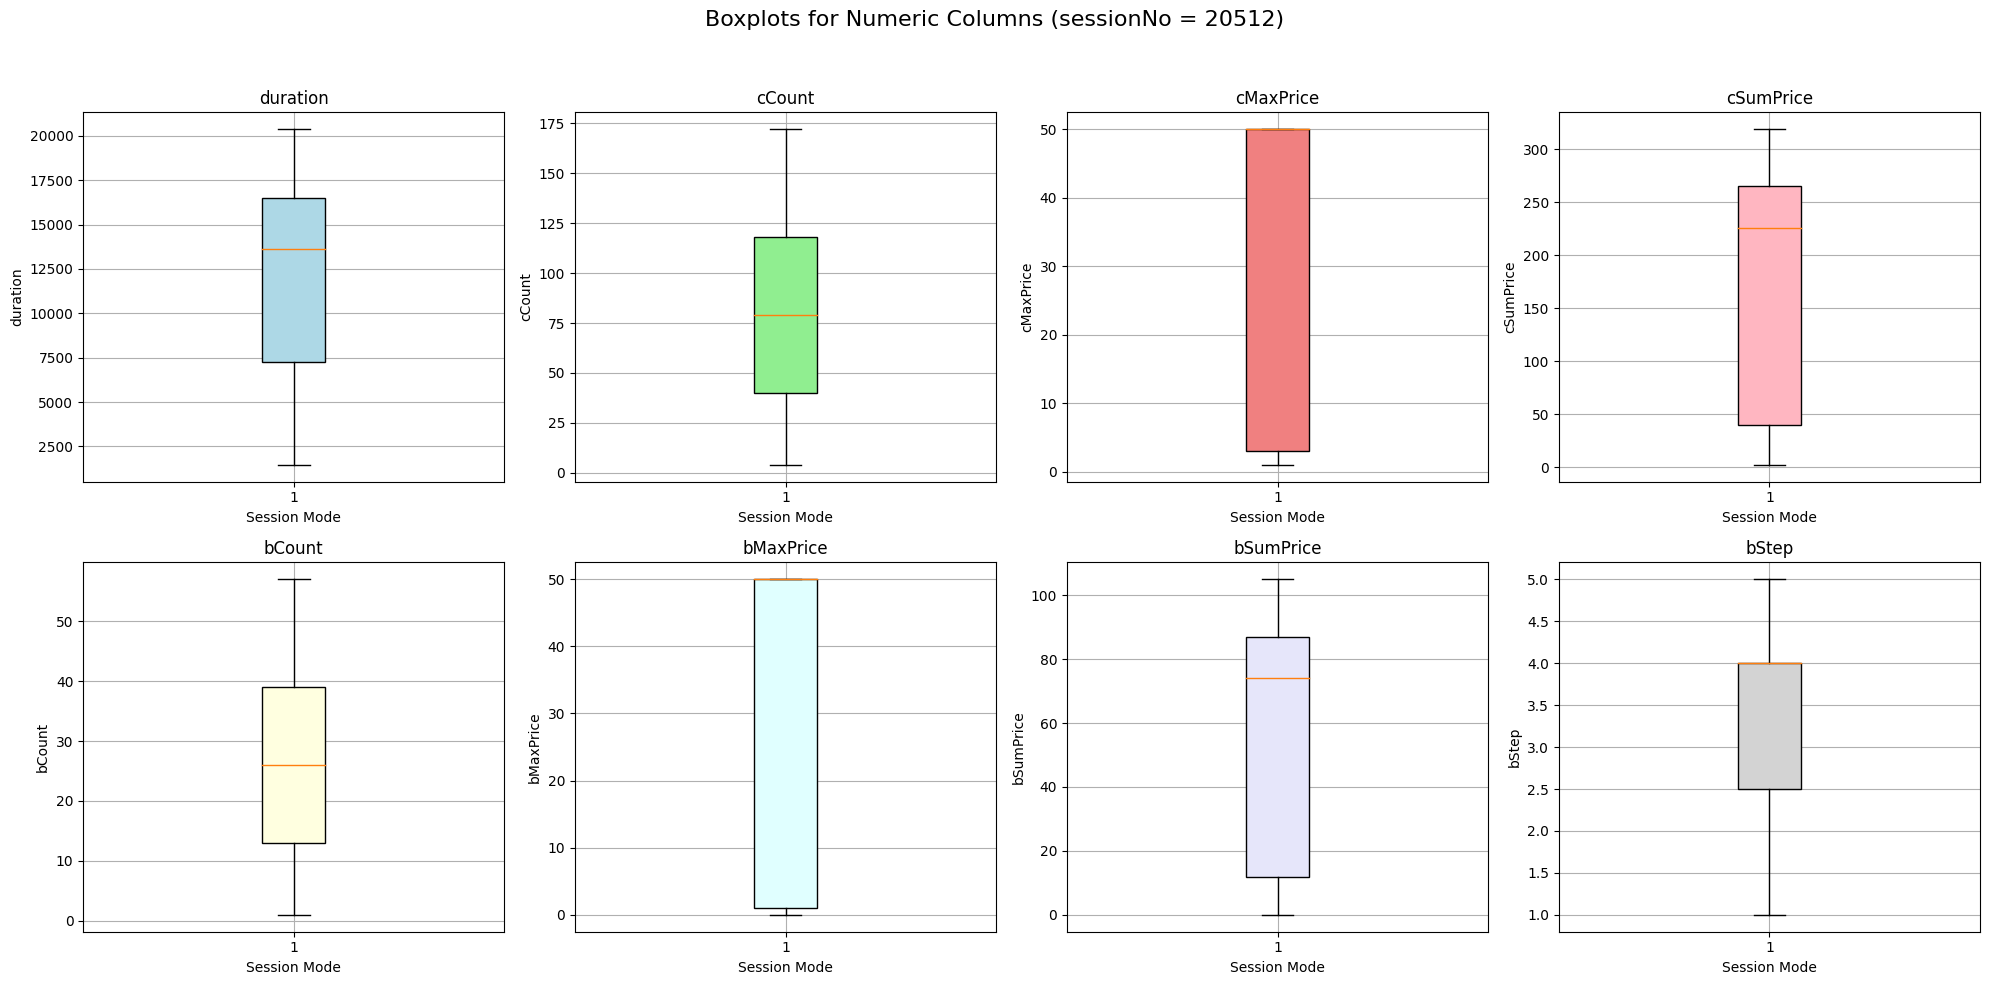

In [19]:
# Menyiapkan grid 2x4 untuk subplot
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle(f"Boxplots for Numeric Columns (sessionNo = {session_mode})", fontsize=16)

# Meratakan array axes untuk mempermudah indexing
axes = axes.flatten()

# Mendefinisikan warna untuk setiap boxplot
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow', 'lightcyan', 'lavender', 'lightgrey']

# Memplot setiap kolom dengan layout yang ditentukan dan warna
for i, column in enumerate(numeric_columns):
    box = axes[i].boxplot(mode_data[column].dropna(), vert=True, patch_artist=True)
    axes[i].set_title(column)
    axes[i].set_xlabel('Session Mode')
    axes[i].set_ylabel(column)
    axes[i].grid(True)
    
    # Terapkan warna ke setiap boxplot
    for patch in box['boxes']:
        patch.set_facecolor(colors[i % len(colors)])

# Menyesuaikan layout agar lebih mudah dibaca
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adds space for the main title
plt.show()


Boxplot ini memperlihatkan distribusi nilai untuk setiap kolom numerik dalam sesi yang paling umum (sessionNo = 20512). Dari visualisasi ini, kita bisa melihat bahwa kolom `duration` memiliki variasi tinggi dengan rentang yang besar, sedangkan cCount dan bCount menunjukkan distribusi yang lebih merata dan stabil. Pada kolom cMaxPrice, cSumPrice, bMaxPrice, dan bSumPrice, terlihat variasi nilai yang cukup besar, yang mungkin mencerminkan perbedaan preferensi harga di antara pengguna.

### Data Redundan Tanpa Memeriksa Durasi

Mengidentifikasi dan menampilkan baris data yang redundan tanpa memasukkan kolom `duration` dalam pemeriksaan, sehingga kita dapat melihat jumlah dan contoh baris yang duplikat pada atribut lainnya. Kolom `duration` dikecualikan karena nilai ini bisa bervariasi meskipun data di kolom lain identik, sehingga pengecualian ini memungkinkan kita menemukan duplikasi yang lebih bermakna pada atribut yang lebih relevan.

In [20]:
# Mengecualikan kolom 'duration'
subset_columns = transact_train.columns.difference(['duration'])

# Mencari baris yang duplikat (kecuali 'duration')
duplicates = transact_train.duplicated(subset=subset_columns, keep=False)

# Menampilkan duplikat, jika ada
duplicate_rows = transact_train[duplicates]
print("Number of redundant rows (excluding 'duration'):", duplicate_rows.shape[0])
duplicate_rows.head()

Number of redundant rows (excluding 'duration'): 156674


,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,bStep,availability,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
4,2,6,5,15.633,0,NaN,NaN,NaN,0,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,2,6,5,26.235,0,NaN,NaN,NaN,0,NaN,...,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,2,6,5,71.200,0,NaN,NaN,NaN,0,NaN,...,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,2,6,5,94.469,0,NaN,NaN,NaN,0,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,3,6,5,310.967,11,9.99,29.99,109.95,2,9.99,...,NaN,7.0,1800.0,475.0,302.0,12.0,45.0,1.0,11.0,1


## Hasil Analisis Sementara

<h2>Analisis Distribusi Data Pada Setiap Kolom Bertipe Numerik</h2>
<p>Analisis ini menunjukkan bahwa sebagian besar kolom numerik dalam dataset memiliki distribusi yang sangat miring ke kiri, dengan mayoritas nilai terkonsentrasi pada angka yang rendah. Ini terlihat jelas pada kolom seperti <code>cCount</code>, <code>cMinPrice</code>, <code>cMaxPrice</code>, <code>bCount</code>, dan <code>payments</code>, di mana sebagian besar data berada di nilai terendah, dan hanya sedikit nilai yang berada di rentang yang lebih tinggi. Hal ini bisa mengindikasikan bahwa kebanyakan transaksi melibatkan interaksi atau nilai yang kecil.</p>
<p>Namun, terdapat beberapa pengecualian, seperti pada kolom <code>customerScore</code> dan <code>accountLifetime</code>, yang menunjukkan sebaran lebih merata dan mungkin mendekati distribusi normal. Pola ini penting untuk diperhatikan dalam analisis lanjutan karena ketidakseimbangan distribusi dapat memengaruhi performa model prediktif, terutama jika model kesulitan mengenali pola dari nilai yang lebih jarang muncul.</p>

<h2>Analisis Distribusi Kolom Order</h2>
<p>Grafik ini menunjukkan distribusi status order, dengan kategori <strong>1</strong> (ada order) dan <strong>0</strong> (tidak ada order). Terlihat bahwa lebih dari 60% data berstatus <strong>1</strong>, sementara sisanya kurang dari 40% berstatus <strong>0</strong>. Ketimpangan ini menunjukkan adanya distribusi data yang tidak seimbang, di mana data dengan status <strong>1</strong> mendominasi.</p>
<p>Dalam konteks pemodelan, ketidakseimbangan ini bisa menjadi tantangan, karena model cenderung belajar lebih banyak dari kelas yang dominan (<strong>1</strong>) dan mungkin kesulitan dalam memprediksi kelas yang kurang terwakili (<strong>0</strong>).</p>


## Check Anomali Value

### Pengecekan Record Data yang Dalam Satu Sesi Durasinya Tidak Bertambah

Mengidentifikasi dan menampilkan data yang memiliki kombinasi sessionNo dan duration yang berulang dalam dataset, sehingga membantu dalam mendeteksi entri duplikat yang mungkin perlu ditinjau lebih lanjut.

In [23]:
# Mengelompokkan berdasarkan sessionNo dan duration serta menghitung jumlah kemunculannya
duplicates = transact_train.groupby(['sessionNo', 'duration']).size().reset_index(name='count')

# Filter untuk catatan yang jumlahnya lebih dari 1 (menunjukkan duplikat)
duplicates = duplicates[duplicates['count'] > 1]

# Menggabungkan untuk mendapatkan data lengkap dari entri duplikat di transact_train
duplicates_data = transact_train.merge(duplicates[['sessionNo', 'duration']], on=['sessionNo', 'duration'], how='inner')

# Menampilkan catatan duplikat
duplicates_data

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,bStep,availability,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,6,6,5,0.000,1,129.99,129.99,129.99,1,129.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,6,5,0.000,2,99.99,129.99,229.98,2,99.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,6,6,5,0.000,3,99.99,169.00,398.98,3,99.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,37,6,5,0.001,2,10.99,19.99,30.98,2,10.99,...,NaN,NaN,4000.0,614.0,133.0,6.0,42.0,2.0,109.0,0
4,37,6,5,0.001,3,5.00,19.99,35.98,3,5.00,...,NaN,NaN,4000.0,614.0,133.0,6.0,42.0,2.0,109.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23951,49990,18,7,0.000,4,9.99,17.99,57.96,4,9.99,...,NaN,NaN,3500.0,504.0,236.0,13.0,41.0,2.0,41.0,1
23952,49990,18,7,0.000,5,9.99,17.99,67.95,5,9.99,...,NaN,NaN,3500.0,504.0,236.0,13.0,41.0,2.0,41.0,1
23953,49990,18,7,0.000,6,9.99,19.99,87.94,6,9.99,...,NaN,NaN,3500.0,504.0,236.0,13.0,41.0,2.0,41.0,1
23954,49990,18,7,0.000,7,9.99,19.99,105.93,7,9.99,...,NaN,NaN,3500.0,504.0,236.0,13.0,41.0,2.0,41.0,1


### Pengecekan Konsistensi Availability pada Setiap SessionNo

Melihat apakah ada sessionNo yang memiliki availability yang berbeda untuk memastikan konsistensi data dalam setiap sesi.

In [24]:
# Melihat apakah ada sessionNo yang memiliki availability yang berbeda

# Mencari sessionNo yang memiliki nilai availability berbeda
duplicates = transact_train.groupby('sessionNo')['availability'].nunique()

# Filter sessionNo yang memiliki lebih dari satu unique value di kolom availability
conflict_sessions = duplicates[duplicates > 1]

# Menampilkan sessionNo yang memiliki availability yang berbeda
if len(conflict_sessions) > 0:
    print("Ada sessionNo yang memiliki availability yang berbeda:")
    print(conflict_sessions)
else:
    print("Tidak ada sessionNo yang memiliki availability yang berbeda.")

Ada sessionNo yang memiliki availability yang berbeda:
sessionNo
22       2
24       2
26       2
28       2
29       2
        ..
49955    2
49960    2
49992    3
49994    2
49996    2
Name: availability, Length: 3375, dtype: int64


## Group By per Session

<p>Pengelompokan data berdasarkan <code>sessionNo</code> dan pengambilan satu entri perwakilan dari setiap kelompok bertujuan untuk menyederhanakan dataset dengan menyimpan satu contoh dari setiap sesi. Pendekatan ini membantu kita memahami hasil yang lebih representatif atau status terkini dari setiap sesi. Dengan cara ini, kita dapat lebih fokus pada data yang relevan dan mengurangi kompleksitas dataset, sehingga analisis berikutnya menjadi lebih mudah.</p>

<p>Setelah melakukan eksplorasi dan analisis, kami memutuskan untuk melakukan merge data berdasarkan <code>sessionNo</code> dengan menerapkan aturan agregasi tertentu. Setiap kolom di merge menggunakan metode yang berbeda: fungsi maksimum (max) digunakan untuk mendapatkan nilai tertinggi, fungsi minimum (min) untuk mengidentifikasi harga terendah, dan fungsi untuk mengambil nilai terakhir yang tidak kosong. Ini penting agar kita mendapatkan informasi yang paling relevan tanpa kehilangan konteks yang penting dalam data, karena satu sesi tidak memerlukan banyak record; kita hanya perlu satu record terakhir.</p>

<ul>
    <li><strong>max:</strong> Digunakan pada kolom seperti <code>startHour</code>, <code>startWeekday</code>, <code>duration</code>, <code>cCount</code>, <code>bCount</code>, <code>cMaxPrice</code>, <code>bMaxPrice</code>, <code>cSumPrice</code>, <code>bSumPrice</code>, <code>bStep</code>, <code>maxVal</code>, dan <code>payments</code> untuk mengetahui nilai tertinggi dalam setiap sesi, yang penting untuk menganalisis puncak aktivitas.</li>
    <li><strong>min:</strong> Digunakan pada kolom <code>cMinPrice</code> dan <code>bMinPrice</code> untuk mengidentifikasi harga terendah dalam setiap sesi, memberikan wawasan tentang rentang harga yang dipilih oleh pengguna.</li>
    <li><strong>last_non_empty:</strong> Digunakan pada kolom <code>availability</code>, <code>customerScore</code>, <code>accountLifetime</code>, <code>age</code>, <code>address</code>, <code>lastOrder</code>, dan <code>order</code> untuk mendapatkan informasi terakhir yang relevan, membantu memahami status terkini dari setiap sesi.</li>
</ul>

<p>Dengan cara ini, kita bisa mendapatkan gambaran yang lebih jelas tentang setiap sesi, menyoroti karakteristik penting dari data. Proses agregasi ini membantu menyederhanakan dataset dengan menghilangkan entri duplikat dan memastikan informasi yang relevan tetap ada, sehingga analisis selanjutnya menjadi lebih mudah dan terfokus.</p>


In [80]:
# Menentukan aturan agregasi kustom, menggunakan fungsi kustom untuk 'terakhir' yang mengabaikan NaN
def last_non_empty(series):
    """Returns the last non-empty (non-NaN) value or NaN if all values are NaN."""
    non_na_values = series.dropna()
    return non_na_values.iloc[-1] if not non_na_values.empty else np.nan

aggregation_rules = {
    'startHour': 'max',
    'startWeekday': 'max',
    'duration': 'max',
    'cCount': 'max',
    'cMinPrice': 'min',
    'cMaxPrice': 'max',
    'cSumPrice': 'max',
    'bCount': 'max',
    'bMinPrice': 'min',
    'bMaxPrice': 'max',
    'bSumPrice': 'max',
    'bStep': 'max',
    'availability': last_non_empty,
    'maxVal': 'max',
    'customerScore': last_non_empty,
    'accountLifetime': last_non_empty,
    'payments': 'max',
    'age': last_non_empty,
    'address': last_non_empty,
    'lastOrder': last_non_empty,
    'order': last_non_empty
}

# Terapkan aturan agregasi ke DataFrame
grouped_train = transact_train.groupby('sessionNo').agg(aggregation_rules).reset_index()
grouped_class = transact_class.groupby('sessionNo').agg(aggregation_rules).reset_index()

# Tampilkan hasil dari DataFrame
grouped_train.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,bStep,availability,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,2.0,7.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,1
1,2,6,5,94.469,0,NaN,NaN,NaN,0,NaN,...,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,6,5,341.613,11,9.99,29.99,109.95,2,9.99,...,4.0,7.0,1800.0,475.0,302.0,12.0,45.0,1.0,11.0,1
3,4,6,5,42.812,4,4.99,4.99,19.96,1,4.99,...,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,5,6,5,2816.046,45,12.99,179.95,1093.72,4,19.99,...,4.0,7.0,800.0,503.0,18.0,1.0,46.0,1.0,40.0,1


Pemeriksaan ini digunakan untuk menampilkan informasi tentang DataFrame grouped_train, termasuk jumlah entri, kolom, tipe data, dan jumlah nilai yang tidak kosong. Ini membantu kita memahami struktur dan kualitas data setelah proses agregasi, serta memastikan bahwa tipe data sudah sesuai dan sebelum melanjutkan analisis.

In [29]:
grouped_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sessionNo        50000 non-null  int64  
 1   startHour        50000 non-null  int64  
 2   startWeekday     50000 non-null  int64  
 3   duration         50000 non-null  float64
 4   cCount           50000 non-null  int64  
 5   cMinPrice        49682 non-null  float64
 6   cMaxPrice        49682 non-null  float64
 7   cSumPrice        49682 non-null  float64
 8   bCount           50000 non-null  int64  
 9   bMinPrice        49325 non-null  float64
 10  bMaxPrice        49325 non-null  float64
 11  bSumPrice        49325 non-null  float64
 12  bStep            38916 non-null  float64
 13  availability     39730 non-null  float64
 14  maxVal           27046 non-null  float64
 15  customerScore    27046 non-null  float64
 16  accountLifetime  27046 non-null  float64
 17  payments    

## Train Model Sebelum Handle Missing Value

### Model XGBoost

Membagi dataset menjadi fitur dan target, kemudian melatih model XGBoost untuk memprediksi hasil pada data pengujian. Langkah pertama adalah memisahkan kolom yang akan digunakan sebagai fitur prediktif (X) dari kolom target yang ingin diprediksi (y). Dengan metode splitting, dataset kemudian dibagi menjadi dua bagian: data pelatihan dan data pengujian. Pembagian ini dilakukan dengan stratifikasi, menjaga agar proporsi kelas dalam target tetap konsisten, sehingga model dilatih dan diuji dengan data yang mewakili keseluruhan distribusi.

In [81]:
# Splitting dataset into features (X) and target (y)
X = grouped_train.drop(columns=['order'])
y = grouped_train['order']

# Splitting data into train and test set with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Training XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Making predictions and evaluating model accuracy
y_pred = xgb_model.predict(X_test)

<p>
Bagian ini mengevaluasi performa model dengan menghitung precision, recall, dan F1-score khusus untuk kelas 1, serta menghasilkan classification report yang merangkum metrik tambahan. Precision, recall, dan F1-score memberikan wawasan tentang akurasi model dalam memprediksi kelas target, sedangkan classification report menunjukkan detail performa model pada setiap kelas. Evaluasi ini penting dalam EDA untuk memahami seberapa baik model dapat memprediksi target dan membantu mengidentifikasi area yang mungkin perlu ditingkatkan.</p>

In [82]:
# Menghitung precision, recall, dan F1-score untuk kelas 1
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, average='weighted')

# Menghasilkan classification report untuk detail metrik tambahan
classification_rep = classification_report(y_test, y_pred)

print(f"Precision (Class 1): {precision:.4f}")
print(f"Recall (Class 1): {recall:.4f}")
print(f"F1 Score (Weighted): {f1:.4f}")
print("\nClassification Report:\n", classification_rep)

Precision (Class 1): 0.8674
Recall (Class 1): 0.8978
F1 Score (Weighted): 0.8891

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      5364
           1       0.87      0.90      0.88      4636

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



<p>Langkah ini dilakukan untuk menghitung <strong>confusion matrix</strong> yang menunjukkan bagaimana model melakukan prediksi dibandingkan dengan label sebenarnya. Matriks ini memberikan gambaran tentang jumlah prediksi yang benar dan salah untuk setiap kelas.</p>

<p>Setelah itu, kita membuat visualisasi <strong>confusion matrix</strong> menggunakan heatmap, yang memudahkan untuk melihat jumlah prediksi yang tepat dan kesalahan yang terjadi. Dengan visualisasi ini, kita dapat lebih memahami kinerja model dan mengidentifikasi area di mana model mungkin perlu diperbaiki, seperti kelas-kelas yang sering salah diklasifikasikan.</p>


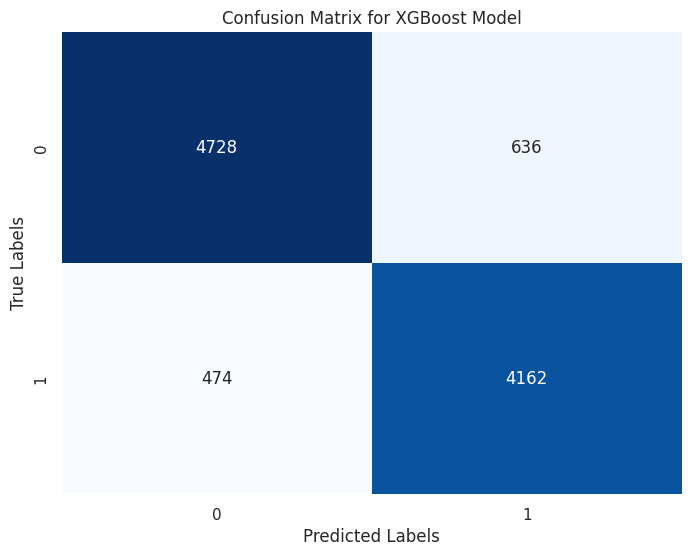

In [83]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for XGBoost Model")
plt.show()

Mengimport data real_class, dimana real_class merupakan data kunci jawaban dari data_class

In [84]:
real_class = pd.read_csv('https://raw.githubusercontent.com/putrahadiyanto/Kelompok5_Tugas3_DataMining/refs/heads/main/DMC%202013_realclass_task1/realclass_t1.txt', sep='|')

Melihat struktur dataframe real_class untuk melihat struktur dan tipedatanya

In [68]:
real_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sessionNo   5111 non-null   int64
 1   prediction  5111 non-null   int64
dtypes: int64(2)
memory usage: 80.0 KB


Memeriksa keseimbangan kelas pada kolom prediction di dataset real_class, yang berisi label sebenarnya (atau "kunci jawaban") dari hasil prediksi. Dengan menghitung jumlah masing-masing kelas dalam kolom ini, kita bisa mengetahui distribusi kelas, yang penting untuk memahami apakah data berimbang atau didominasi oleh satu kelas tertentu.

/tmp/ipykernel_1339/2637935878.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


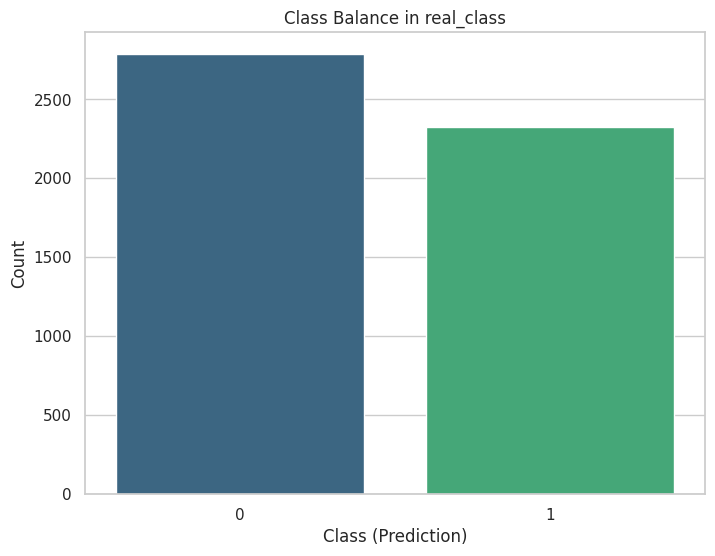

In [89]:
# Count the balance of each class in 'prediction' column of real_class
class_counts = real_class['prediction'].value_counts()

# Plotting the balance
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xlabel('Class (Prediction)')
plt.ylabel('Count')
plt.title('Class Balance in real_class')
plt.show()

Menggunakan model yang telah dilatih sebelumnya untuk memprediksi nilai target pada data nyata (grouped_class). Kolom order juga dihapus dari grouped_class karena itu adalah target sebenarnya yang ingin diprediksi oleh model. 

In [85]:
grouped_class['availability'] = grouped_class['availability'].astype('category').cat.codes

# Step 3: Pastikan `grouped_class` memiliki kolom yang sama dengan `X_train`
# Jika ada kolom yang tidak diperlukan, kita drop
X_grouped_class = grouped_class.drop(columns=['order'], errors='ignore')

# Step 4: Predict using the trained model
y_grouped_class_pred = xgb_model.predict(X_grouped_class)

Hasi dari prediksi ditaruh pada dataframe prediksi_class, kemudian melihat isi dari prediksi_class tersebut.

In [86]:
prediksi_class = pd.DataFrame({
    'sessionNo': grouped_class['sessionNo'],
    'prediction': y_grouped_class_pred
})

prediksi_class.head()

,sessionNo,prediction
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


Bagian ini mengevaluasi performa model pada data nyata dengan menggabungkan hasil prediksi (prediksi_class) dan data aktual (real_class) berdasarkan sessionNo. Setelah data digabungkan, akurasi dan F1-score dihitung untuk menilai seberapa baik model dalam memprediksi hasil yang benar, serta mempertimbangkan keseimbangan precision dan recall. Classification report ditambahkan untuk melihat detail performa model pada setiap kelas, memberikan gambaran lengkap mengenai kekuatan dan kelemahan model saat diterapkan pada data asli.

In [88]:
# Step 1: Merge `prediksi_class` with `real_class` on `sessionNo`
merged_df = prediksi_class.merge(real_class, on='sessionNo', how='inner')

# Step 2: Calculate accuracy and F1 score
accuracy = accuracy_score(merged_df['prediction_x'], merged_df['prediction_y'])
f1 = f1_score(merged_df['prediction_x'], merged_df['prediction_y'], average='weighted')

print(f'Accuracy of Model on Real Data: {accuracy:.4f}')
print(f'F1 Score of Model on Real Data: {f1:.4f}')

# Optional: Detailed classification report
print("\nClassification Report:\n", classification_report(merged_df['prediction_x'], merged_df['prediction_y']))

Accuracy of Model on Real Data: 0.6288
F1 Score of Model on Real Data: 0.6718

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.61      0.73      4191
           1       0.29      0.73      0.42       920

    accuracy                           0.63      5111
   macro avg       0.60      0.67      0.57      5111
weighted avg       0.80      0.63      0.67      5111



## Analisis dataset GroupBy

In [95]:
# Calculate the total NaN values per column
nan_count = grouped_train.isna().sum()

# Calculate the percentage of NaN values per column
nan_percentage = (grouped_train.isna().mean() * 100).round(2)

# Combine the count and percentage into a DataFrame with a header for attribute names
nan_summary = pd.DataFrame({
    'Attribute Name': nan_count.index,
    'NaN Count': nan_count.values,
    'NaN Percentage (%)': nan_percentage.values
})

nan_summary

,Attribute Name,NaN Count,NaN Percentage (%)
0,sessionNo,0,0.0
1,startHour,0,0.0
2,startWeekday,0,0.0
3,duration,0,0.0
4,cCount,0,0.0
5,cMinPrice,0,0.0
6,cMaxPrice,0,0.0
7,cSumPrice,0,0.0
8,bCount,0,0.0
9,bMinPrice,0,0.0


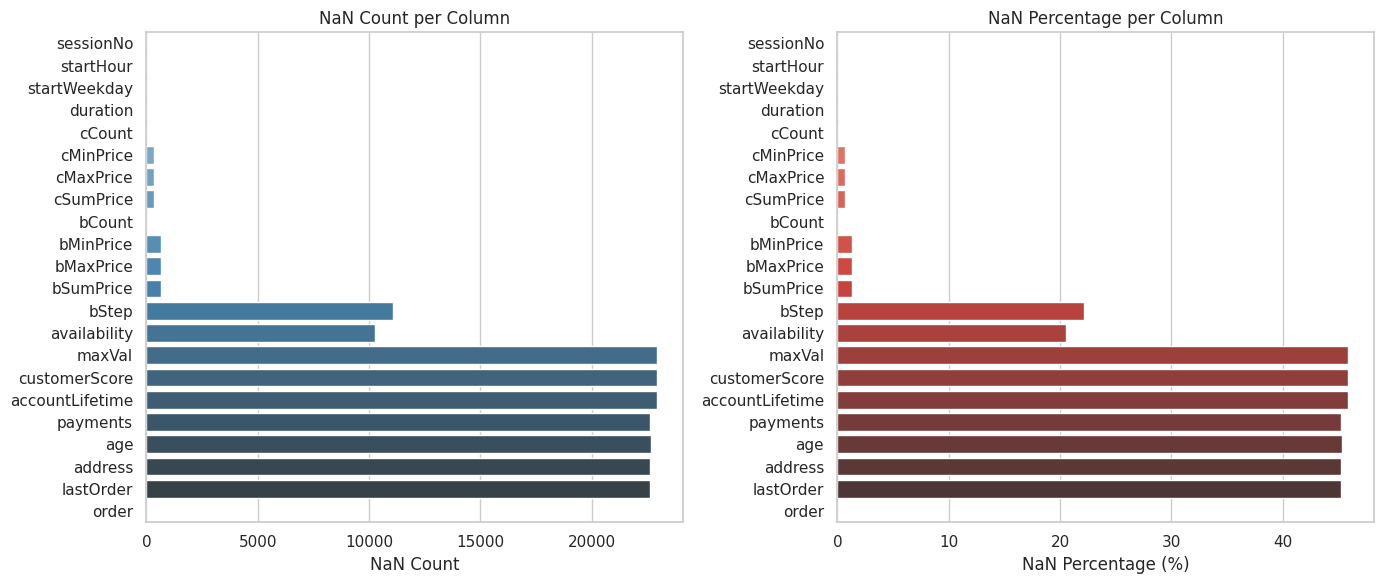

In [36]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure and axis object
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot NaN Count Bar Chart (Fixed)
sns.barplot(x='NaN Count', y='Attribute Name', data=nan_summary, ax=ax[0], hue='Attribute Name', palette='Blues_d')
ax[0].set_title('NaN Count per Column')
ax[0].set_xlabel('NaN Count')
ax[0].set_ylabel('')

# Plot NaN Percentage Bar Chart (Fixed)
sns.barplot(x='NaN Percentage (%)', y='Attribute Name', data=nan_summary, ax=ax[1], hue='Attribute Name', palette='Reds_d')
ax[1].set_title('NaN Percentage per Column')
ax[1].set_xlabel('NaN Percentage (%)')
ax[1].set_ylabel('')

# Show the plot
plt.tight_layout()
plt.show()

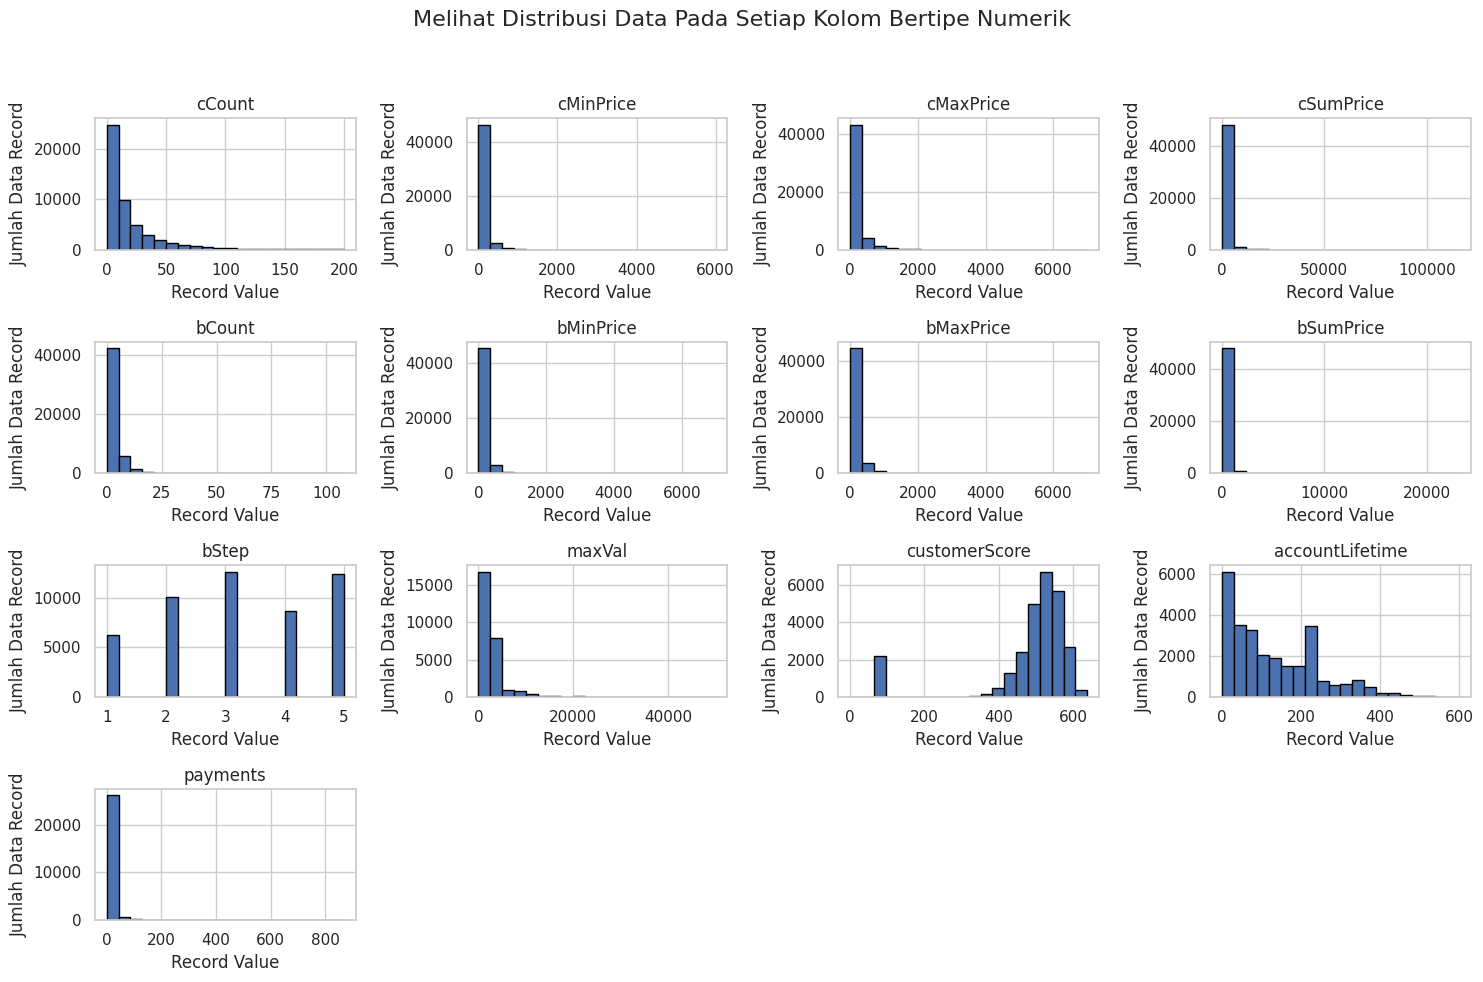

In [92]:
# Membuat list kolom yang akan ditampilkan
columns_to_plot = ['cCount', 'cMinPrice', 'cMaxPrice', 'cSumPrice', 
                   'bCount', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 
                   'bStep', 'maxVal', 'customerScore', 'accountLifetime', 'payments']

# Membuat histogram untuk setiap kolom di 'columns_to_plot'
fig, axes = plt.subplots(len(columns_to_plot) // 4 + 1, 4, figsize=(15, 10))  # Buat grid
axes = axes.flatten()  # Flatten untuk akses subplot yang lebih mudah

# Loop untuk membuat histogram per kolom dan menambahkan label masing-masing
for i, col in enumerate(columns_to_plot):
    grouped_train[col].hist(bins=20, ax=axes[i], edgecolor='black')
    axes[i].set_title(col)  # Judul untuk setiap subplot
    axes[i].set_xlabel('Record Value')  # Label X untuk setiap kolom
    axes[i].set_ylabel('Jumlah Data Record')  # Label Y untuk setiap kolom

# Menghapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menambahkan judul utama
fig.suptitle('Melihat Distribusi Data Pada Setiap Kolom Bertipe Numerik', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Hasil Analisis:

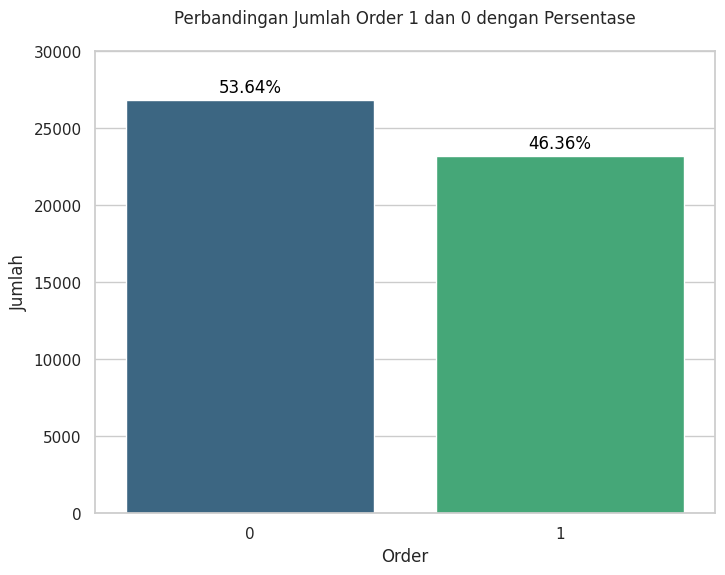

In [38]:
# Menghitung jumlah dan persentase order 0 dan 1
order_counts = grouped_train['order'].value_counts()
order_percentages = (order_counts / len(grouped_train) * 100).round(2)

# Membuat DataFrame untuk menampung jumlah dan persentase
order_summary = pd.DataFrame({
    'Order': order_counts.index,
    'Count': order_counts.values,
    'Percentage': order_percentages.values
})

# Membuat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Order', y='Count', data=order_summary, hue='Order', dodge=False, palette='viridis')
plt.title('Perbandingan Jumlah Order 1 dan 0 dengan Persentase', pad=20)  # Menambah jarak judul dengan pad
plt.xlabel('Order')
plt.ylabel('Jumlah')

# Mengatur batas atas sumbu y agar mencapai 30,000
plt.ylim(0, 30000)

# Menambahkan persentase di atas setiap bar
for index, row in order_summary.iterrows():
    plt.text(row.name, row['Count'] + 500, f"{row['Percentage']}%", ha='center', color='black')

# Menyembunyikan legenda
plt.legend([],[], frameon=False)
plt.show()

## Mengatasi Missing Value

In [94]:
# Kolom-kolom yang akan diimputasi
columns_to_impute = ['cMinPrice', 'cMaxPrice', 'cSumPrice', 
                     'bMinPrice', 'bMaxPrice', 'bSumPrice', 
                     'bStep', 'availability', 'maxVal', 
                     'customerScore', 'accountLifetime', 
                     'payments', 'age', 'address', 'lastOrder']



# Inisialisasi KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)  # Menentukan jumlah tetangga yang digunakan

# Imputasi untuk beberapa kolom sekaligus
grouped_train[columns_to_impute] = knn_imputer.fit_transform(grouped_train[columns_to_impute])

# Untuk kolom-kolom yang hanya memiliki nilai integer tetap (seperti 'bStep'), kita akan membulatkan hasilnya
# Kolom 'bStep' harus dibulatkan ke nilai integer yang valid
grouped_train['bStep'] = grouped_train['bStep'].round().astype(int)
grouped_train['address'] = grouped_train['address'].round().astype(int)
grouped_train['age'] = grouped_train['age'].round().astype(int)
grouped_train['payments'] = grouped_train['payments'].round().astype(int)
grouped_train['accountLifetime'] = grouped_train['accountLifetime'].round().astype(int)
grouped_train['customerScore'] = grouped_train['customerScore'].round().astype(int)
grouped_train['maxVal'] = grouped_train['maxVal'].round().astype(int)
grouped_train['availability'] = grouped_train['availability'].round().astype(int)
grouped_train['lastOrder'] = grouped_train['lastOrder'].round().astype(int)

In [104]:
# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)  # Specify the number of neighbors

# Impute missing values for the specified columns in grouped_class
grouped_class[columns_to_impute] = knn_imputer.fit_transform(grouped_class[columns_to_impute])

# Round specific columns to maintain integer values for categorical or discrete features
grouped_class['bStep'] = grouped_class['bStep'].round().astype(int)
grouped_class['address'] = grouped_class['address'].round().astype(int)
grouped_class['age'] = grouped_class['age'].round().astype(int)
grouped_class['payments'] = grouped_class['payments'].round().astype(int)
grouped_class['accountLifetime'] = grouped_class['accountLifetime'].round().astype(int)
grouped_class['customerScore'] = grouped_class['customerScore'].round().astype(int)
grouped_class['maxVal'] = grouped_class['maxVal'].round().astype(int)
grouped_class['availability'] = grouped_class['availability'].round().astype(int)
grouped_class['lastOrder'] = grouped_class['lastOrder'].round().astype(int)

In [91]:
grouped_train['bStep'].unique()

array([2, 4, 1, 3, 5])

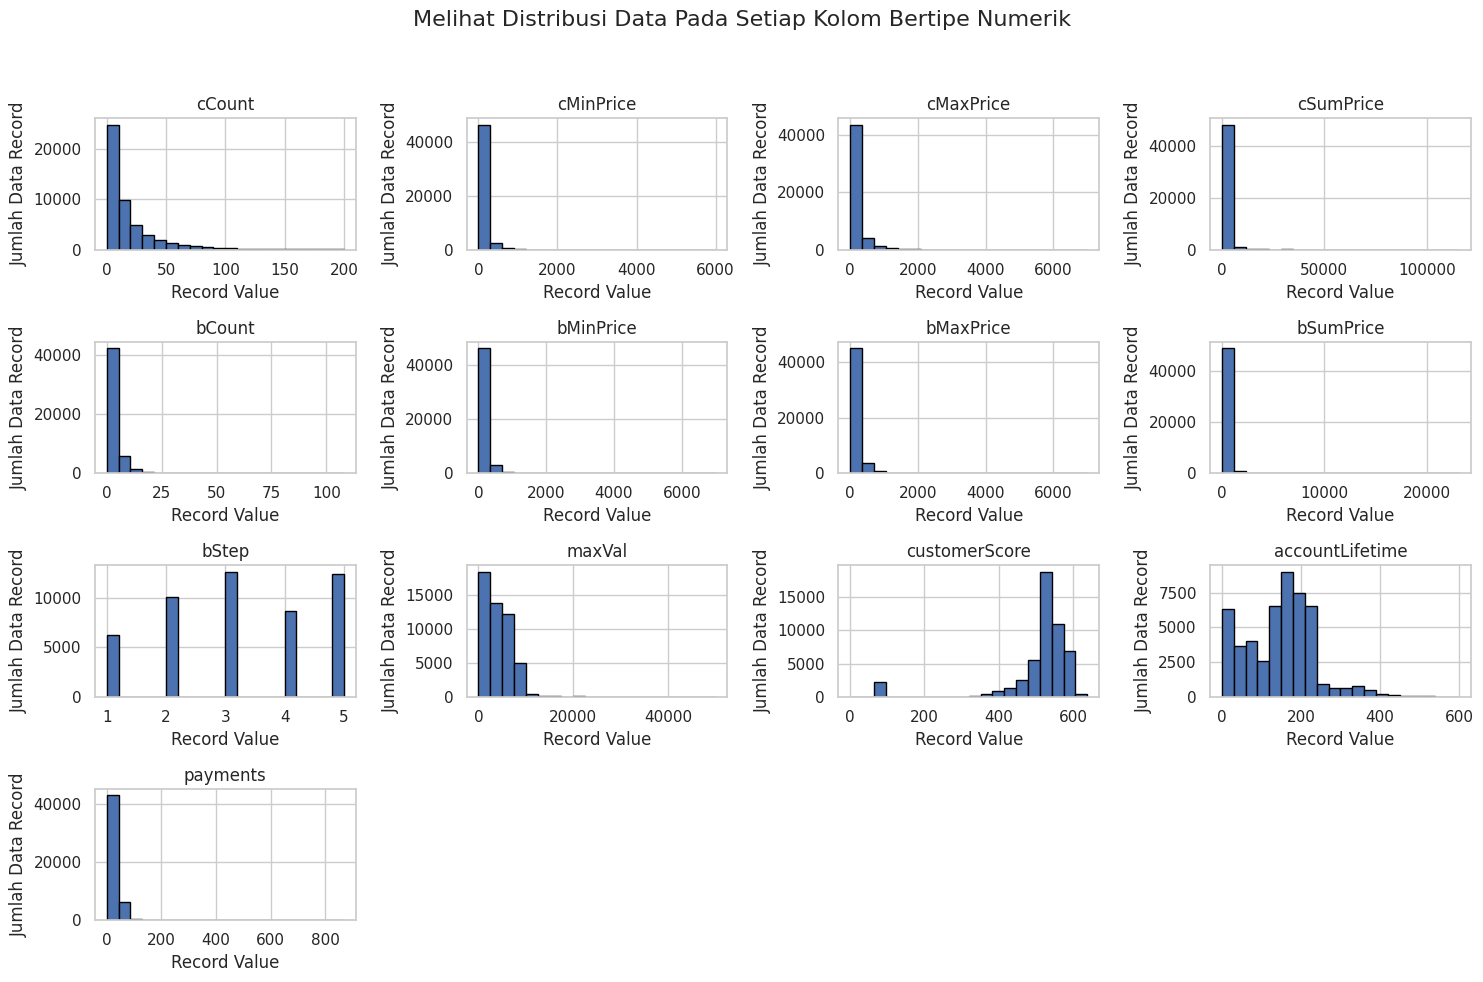

In [96]:
# Membuat list kolom yang akan ditampilkan
columns_to_plot = ['cCount', 'cMinPrice', 'cMaxPrice', 'cSumPrice', 
                   'bCount', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 
                   'bStep', 'maxVal', 'customerScore', 'accountLifetime', 'payments']

# Membuat histogram untuk setiap kolom di 'columns_to_plot'
fig, axes = plt.subplots(len(columns_to_plot) // 4 + 1, 4, figsize=(15, 10))  # Buat grid
axes = axes.flatten()  # Flatten untuk akses subplot yang lebih mudah

# Loop untuk membuat histogram per kolom dan menambahkan label masing-masing
for i, col in enumerate(columns_to_plot):
    grouped_train[col].hist(bins=20, ax=axes[i], edgecolor='black')
    axes[i].set_title(col)  # Judul untuk setiap subplot
    axes[i].set_xlabel('Record Value')  # Label X untuk setiap kolom
    axes[i].set_ylabel('Jumlah Data Record')  # Label Y untuk setiap kolom

# Menghapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menambahkan judul utama
fig.suptitle('Melihat Distribusi Data Pada Setiap Kolom Bertipe Numerik', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Train Model Data Akhir

In [97]:
# Splitting dataset into features (X) and target (y)
X = grouped_train.drop(columns=['order'])
y = grouped_train['order']

# Splitting data into train and test set with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Training XGBoost model
xgb_model_akhir = XGBClassifier(eval_metric='logloss')
xgb_model_akhir.fit(X_train, y_train)

# Making predictions and evaluating model accuracy
y_pred = xgb_model_akhir.predict(X_test)

In [98]:
# Menghitung precision, recall, dan F1-score untuk kelas 1
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, average='weighted')

# Menghasilkan classification report untuk detail metrik tambahan
classification_rep = classification_report(y_test, y_pred)

print(f"Precision (Class 1): {precision:.4f}")
print(f"Recall (Class 1): {recall:.4f}")
print(f"F1 Score (Weighted): {f1:.4f}")
print("\nClassification Report:\n", classification_rep)

Precision (Class 1): 0.8696
Recall (Class 1): 0.8803
F1 Score (Weighted): 0.8833

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      5364
           1       0.87      0.88      0.87      4636

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [99]:
grouped_class['availability'] = grouped_class['availability'].astype('category').cat.codes

# Step 3: Pastikan `grouped_class` memiliki kolom yang sama dengan `X_train`
# Jika ada kolom yang tidak diperlukan, kita drop
X_grouped_class = grouped_class.drop(columns=['order'], errors='ignore')

# Step 4: Predict using the trained model
y_grouped_class_pred = xgb_model.predict(X_grouped_class)

In [100]:
prediksi_class = pd.DataFrame({
    'sessionNo': grouped_class['sessionNo'],
    'prediction': y_grouped_class_pred
})

prediksi_class.head()

,sessionNo,prediction
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [101]:
# Step 1: Merge `prediksi_class` with `real_class` on `sessionNo`
merged_df = prediksi_class.merge(real_class, on='sessionNo', how='inner')

# Step 2: Calculate accuracy and F1 score
accuracy = accuracy_score(merged_df['prediction_x'], merged_df['prediction_y'])
f1 = f1_score(merged_df['prediction_x'], merged_df['prediction_y'], average='weighted')

print(f'Accuracy of Model on Real Data: {accuracy:.4f}')
print(f'F1 Score of Model on Real Data: {f1:.4f}')

# Optional: Detailed classification report
print("\nClassification Report:\n", classification_report(merged_df['prediction_x'], merged_df['prediction_y']))

Accuracy of Model on Real Data: 0.6298
F1 Score of Model on Real Data: 0.6723

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.61      0.73      4184
           1       0.29      0.73      0.42       927

    accuracy                           0.63      5111
   macro avg       0.60      0.67      0.57      5111
weighted avg       0.80      0.63      0.67      5111



In [102]:
# Splitting dataset into features (X) and target (y)
X = grouped_train.drop(columns=['order'])
y = grouped_train['order']

# Splitting data into train and test set with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Training Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions and evaluating model accuracy
y_pred = rf_model.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy of Random Forest Model: {accuracy:.4f}')
print(f'F1 Score of Random Forest Model: {f1:.4f}')

# Optional: Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy of Random Forest Model: 0.8794
F1 Score of Random Forest Model: 0.8794

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      5364
           1       0.87      0.87      0.87      4636

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [105]:
# Step 1: Encode 'availability' in `grouped_class`
grouped_class['availability'] = grouped_class['availability'].astype('category').cat.codes

# Step 2: Pastikan `grouped_class` memiliki kolom yang sama dengan `X_train`
# Jika ada kolom yang tidak diperlukan, kita drop
X_grouped_class = grouped_class.drop(columns=['order'], errors='ignore')

# Step 3: Predict using the trained Random Forest model
y_grouped_class_pred = rf_model.predict(X_grouped_class)

# Menyimpan hasil prediksi ke dalam dataframe baru
prediksi_class = pd.DataFrame({
    'sessionNo': grouped_class['sessionNo'],
    'prediction': y_grouped_class_pred
})

# Menampilkan beberapa hasil prediksi
prediksi_class.head()

,sessionNo,prediction
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0


In [106]:
# Step 1: Merge `prediksi_class` with `real_class` on `sessionNo`
merged_df = prediksi_class.merge(real_class, on='sessionNo', how='inner')

# Step 2: Calculate accuracy and F1 score
accuracy = accuracy_score(merged_df['prediction_x'], merged_df['prediction_y'])
f1 = f1_score(merged_df['prediction_x'], merged_df['prediction_y'], average='weighted')

print(f'Accuracy of Model on Real Data: {accuracy:.4f}')
print(f'F1 Score of Model on Real Data: {f1:.4f}')

# Optional: Detailed classification report
print("\nClassification Report:\n", classification_report(merged_df['prediction_x'], merged_df['prediction_y']))

Accuracy of Model on Real Data: 0.6455
F1 Score of Model on Real Data: 0.6599

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.64      0.72      3580
           1       0.44      0.67      0.53      1531

    accuracy                           0.65      5111
   macro avg       0.63      0.65      0.62      5111
weighted avg       0.70      0.65      0.66      5111



## Kesimpulan Sementara

<ol>
    <li>
        Model pertama yang menggunakan XGBoost tanpa penanganan missing value menghasilkan akurasi yang cukup baik pada data uji, yaitu 89%. Namun, ketika diuji pada dataset asli, akurasi menurun menjadi 63%, menunjukkan adanya indikasi overfitting pada model ini.
    </li>
    <li>
        Model kedua yang menggunakan dataset dengan penanganan missing value tidak menunjukkan peningkatan akurasi yang signifikan dibandingkan model pertama. Hal ini mengindikasikan bahwa beberapa kolom dengan missing value mungkin tidak berpengaruh besar terhadap prediksi model, atau mungkin ada faktor lain yang perlu diperhatikan untuk mengurangi overfitting.
    </li>
    <li>
        Kedua model tersebut menunjukkan perlunya eksplorasi lebih lanjut, baik dari segi pemilihan fitur maupun teknik regularisasi, agar model dapat memiliki performa yang lebih konsisten saat diterapkan pada data baru.
    </li>
</ol>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ed8bd3b6-3931-4904-adcf-a74c9d626675' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>